In [113]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


''' Team Members : Utsav
                   Vinay Kumar
                   Gopesh Sharma 
'''
df = pd.read_csv("ML101_train_dataset.csv")
df = df.where(pd.notnull(df), None)
df = df[(df['Systolic BP'] > 0)] 
df = df.dropna(subset=["LifeStyle", "Gender"])
male_data = df[df['Gender'] == 'Male'].copy() 
female_data = df[df['Gender'] == 'Female'].copy()  


In [114]:

# def lin_interpol(prev_val, next_val, prev_index, next_index, miss_index):
#     return prev_val + ((next_val - prev_val) / (next_index - prev_index)) * (miss_index - prev_index)

# for cols in male_data.columns[0:4]:
#     att_vals = male_data[cols].values
#     for j in range(len(att_vals)):
#         if pd.isna(att_vals[j]):
#             prev_index = j - 1
#             if not pd.isna(att_vals[prev_index]):
#                 next_index = j + 1
#                 while pd.isna(att_vals[next_index]):
#                     next_index += 1

#                 next_val = att_vals[next_index]
#                 miss_index = j
#                 att_vals[miss_index] = lin_interpol(att_vals[prev_index], next_val, prev_index, next_index, miss_index)

#     male_data[cols] = att_vals


# for cols in female_data.columns[0:4]:
#     att_vals = female_data[cols].values
#     for j in range(len(att_vals)):
#         if pd.isna(att_vals[j]):
#             prev_index = j - 1
#             if not pd.isna(att_vals[prev_index]):
#                 next_index = j + 1
#                 while pd.isna(att_vals[next_index]):
#                     next_index += 1

#                 next_val = att_vals[next_index]
#                 miss_index = j
#                 att_vals[miss_index] = lin_interpol(att_vals[prev_index], next_val, prev_index, next_index, miss_index)

#     female_data[cols] = att_vals
    


       Average Daily Steps  Hours of Sleep  Caloric Intake   Age      Height  \
0             15725.000000        6.518042          1714.0  56.0  178.416872   
1              7424.000000        4.856772          1366.0  46.0  182.281966   
2             16484.000000        4.380561          2373.0  25.0  175.016582   
3              2798.000000        7.573938          1377.0  75.0  156.310888   
4             15435.000000        4.762614          3351.0  41.0  177.353966   
...                    ...             ...             ...   ...         ...   
71962          6937.000000        9.949328          3196.0  19.0  154.913588   
71963          3786.000000        8.629857          2016.0  58.0  160.870033   
71964         10512.323774        4.724017          1650.0  37.0  159.309849   
71965         16215.000000        7.008294          1195.0  44.0  162.921205   
71966         12110.000000        9.843323          1434.0  72.0  155.025779   

           Weight  Cholesterol level  B

C:\Users\91701\AppData\Local\Temp\ipykernel_30512\649907680.py:18: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = combined_df.corr()


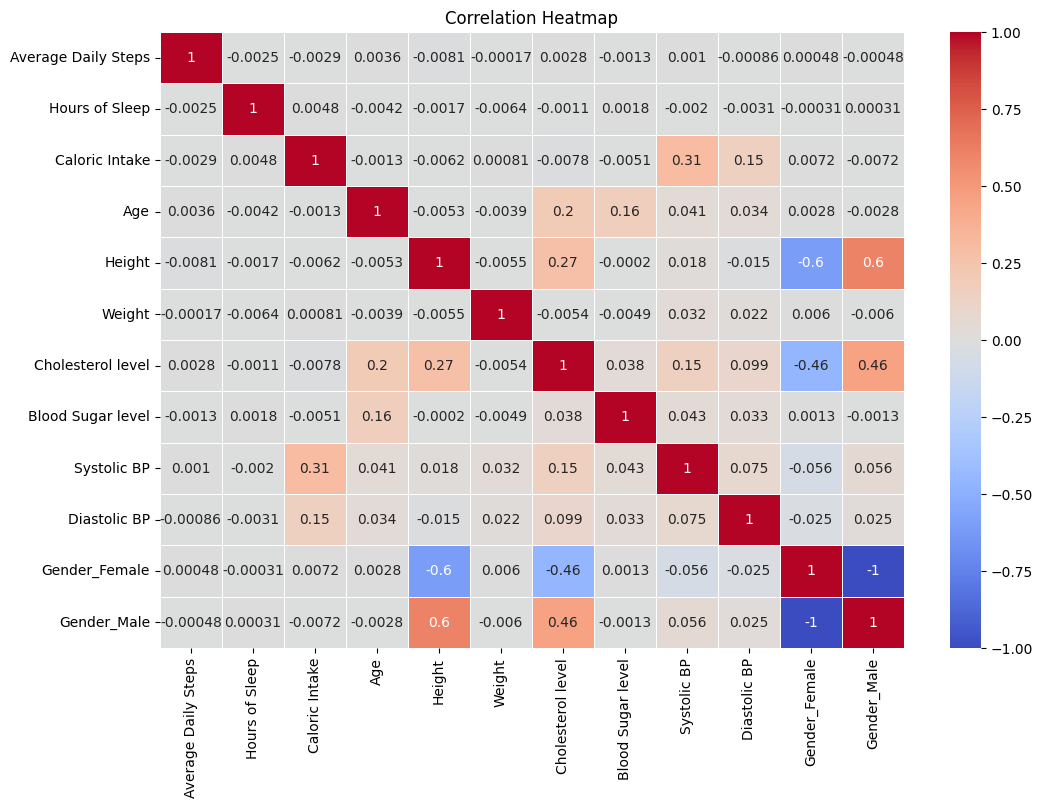

In [115]:

columns_to_fill =df.columns[0:4].append(df.columns[5:-1])

# we use mean to fill the data because most of the columns follow gaussian distribution 
# Replace NaN values with column means because the columns after gender follow gausssian distribution
for col in columns_to_fill:
    col_mean = female_data[col].mean()
    female_data[col].fillna(col_mean, inplace=True)
    
for col in columns_to_fill:
    col_mean = male_data[col].mean()
    male_data[col].fillna(col_mean, inplace=True)
    
combined_df = pd.concat([male_data, female_data],ignore_index=True)
combined_df = pd.get_dummies(combined_df, columns=['Gender'], prefix=['Gender'])
print(combined_df)


correlation_matrix = combined_df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()


In [116]:
df3 = pd.read_csv('ML101_dataset_test_feature.csv')
df4 = df3.drop(['Average Daily Steps','Hours of Sleep','Gender'], axis=1)

# df4  = df3.drop(columns='Gender')
x_train = combined_df.drop(['LifeStyle'],axis =1)


In [117]:

# pca = PCA(n_components=2)
# principal_components = pca.fit_transform(x_train)

# explained_variance = pca.explained_variance_ratio_
# print("Explained Variance Ratio:", explained_variance)

# print("PCA-transformed Data:")
# print(principal_components)


In [118]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

X = x_train.drop(['Systolic BP','Diastolic BP','Average Daily Steps','Hours of Sleep','Gender_Female','Gender_Male'], axis=1)

y1 = x_train['Systolic BP']
y2 = x_train['Diastolic BP']

# X_train, X_test, y1_train, y1_test,y2_train, y2_test = train_test_split(X, y1,y2, test_size=0.3, random_state=42)

model1 = LinearRegression()
model1.fit(X, y1)
y1_pred = model1.predict(df4)
predictions_df1 = pd.DataFrame(y1_pred, columns=['Systolic BP'])

model2 = LinearRegression()
model2.fit(X, y2)
y2_pred = model2.predict(df4)
predictions_df2 = pd.DataFrame(y2_pred, columns=['Diastolic BP']) 

l1 = range(0,5000)
predictions_df1['Diastolic BP']=predictions_df2['Diastolic BP']
predictions_df1['ID'] = l1
predictions_df1.to_csv('BP1.csv', index=False)

df3['Systolic BP']=predictions_df1['Systolic BP']
df3['Diastolic BP']=predictions_df1['Diastolic BP']
print(df3)
df3 = pd.get_dummies(df3, columns=['Gender'], prefix=['Gender'])
print(df3)

      Average Daily Steps  Hours of Sleep  Caloric Intake  Age  Gender  \
0                   14459        4.787873            1422   56    Male   
1                    6646        6.144477            3381   69  Female   
2                   12495        9.864741            2864   46  Female   
3                   19544        6.454921            2952   32  Female   
4                    1650        4.849038            1687   60  Female   
...                   ...             ...             ...  ...     ...   
4995                16296        8.361073            3160   42  Female   
4996                12484        6.889406            1559   39  Female   
4997                18230        5.213463            2081   48  Female   
4998                11509        7.284685            3244   34    Male   
4999                15517        7.580033            2741   72  Female   

          Height     Weight  Cholesterol level  Blood Sugar level  \
0     170.117262  57.856498         222.76

In [119]:

#  Evaluate the models
# mse1 = mean_squared_error(y1_test, y1_pred)
# r2_1 = r2_score(y1_test, y1_pred)

# mse2 = mean_squared_error(y2_test, y2_pred)
# r2_2 = r2_score(y2_test, y2_pred)

# print("Model 1 - Mean Squared Error:", mse1)
# print("Model 1 - R-squared:", r2_1)

# print("Model 2 - Mean Squared Error:", mse2)
# print("Model 2 - R-squared:", r2_2)


In [120]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

y_tr = combined_df['LifeStyle']
x_train = combined_df.drop(['LifeStyle'],axis =1)
# X_train, X_test, y_train, y_test = train_test_split(x_train, y_tr, test_size=0.3, stratify=y_tr, random_state=42)

#here we also used knn and bayes classifier but that gives less accuracy about 70 percent thats why we use random forest and it gives us 90 percent accuracy

#Random Forest classifier
random_forest = RandomForestClassifier(n_estimators=30)
random_forest.fit(x_train, y_tr)
y_pred = random_forest.predict(df3)
predictions_df = pd.DataFrame(y_pred, columns=['LifeStyle'])
predictions_df.to_csv('lifeStyle.csv', index=False)

#Evaluate the classifiers performance
# accuracy = accuracy_score(y_test, y_pred)
# print("Accuracy:", accuracy)
